In [1]:
# Cornish-fisher VAR
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['VOO']

adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
log_returns

[*********************100%%**********************]  1 of 1 completed


,VOO
Date,
2010-09-10,0.004530
2010-09-13,0.012498
2010-09-14,-0.000194
2010-09-15,0.002520
2010-09-16,-0.000387
...,...
2024-02-13,-0.014195
2024-02-14,0.009471
2024-02-15,0.006742


$ z_{\text{CF}} = z + \frac{1}{6} (z^2 - 1) \times \text{Skewness} + \frac{1}{24} (z^3 - 3z) \times (\text{Kurtosis}-3) - \frac{1}{36} (2z^3 - 5z) \times \text{Skewness}^2 \$



In [2]:
from scipy.stats import norm
from scipy.stats import kurtosis

confidence_level = 0.99
time_horizon = 1  # in days

mean = log_returns.iloc[:,0].mean()
std = log_returns.iloc[:,0].std() 
k = kurtosis(log_returns.iloc[:,0].dropna())
s = log_returns.iloc[:,0].skew()
z = norm.ppf(1-confidence_level)
z_cf = z + (z**2-1)*s/6 + (z**3-3*z)*(k-3)/24 - (2*z**3-5*z)*(s**2)/36
cornish_fisher_VAR = mean + z_cf* std* np.sqrt(time_horizon)
   

print(f"Cornish-fisher VAR ({confidence_level * 100:.2f}% confidence) for {time_horizon}-day horizon: {cornish_fisher_VAR * 100:.4f}%")

Cornish-fisher VAR (99.00% confidence) for 1-day horizon: -5.7022%


(-0.08, 0.08)

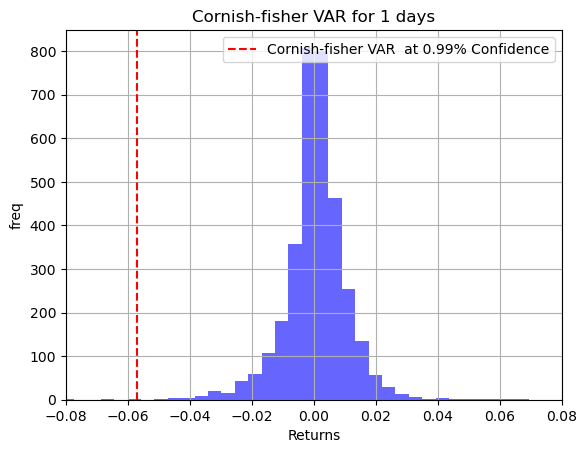

In [3]:
log_returns.iloc[:,0].hist(bins=50  ,color='blue', alpha=0.6)

plt.xlabel('Returns')
plt.ylabel('freq')
plt.axvline(x=cornish_fisher_VAR, linestyle='--', color='r', label= f'Cornish-fisher VAR  at {confidence_level}% Confidence')
plt.title(f'Cornish-fisher VAR for {time_horizon} days')
plt.legend()
plt.xlim(-0.08, 0.08)